In [30]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
#Load the dataset 
df = pd.read_excel('dataset.xlsx')

In [32]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [33]:
df.shape

(541909, 8)

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
df.shape


(406829, 8)

In [37]:
df = df[df['InvoiceNo'] != 0]  # Keeps only the rows where 'Sales' is not zero
df = df[df['Quantity'] > 0]  # Keeps only the rows where 'Sales' is greater than or equal to zero

In [38]:
print(df[df['InvoiceNo'] == 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [39]:
print(df[df['Quantity'] < 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [40]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [41]:
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Description'] = df['Description'].str.strip()
df['CustomerID'] = df['CustomerID'].astype(int)

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['InvoiceNo'] = labelencoder.fit_transform(df['InvoiceNo'])

In [43]:
df.duplicated().sum()

5192

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.duplicated().sum()

0

In [46]:
# Add new column 
df['CancelledOrder'] = df['InvoiceNo'].astype(str).str.startswith('C').astype('int')
df['InternationalOrders'] = (df['Country']!='United Kingdom').astype('int')
df['Sales'] = df['Quantity']*df['UnitPrice']

In [47]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'CancelledOrder',
       'InternationalOrders', 'Sales'],
      dtype='object')

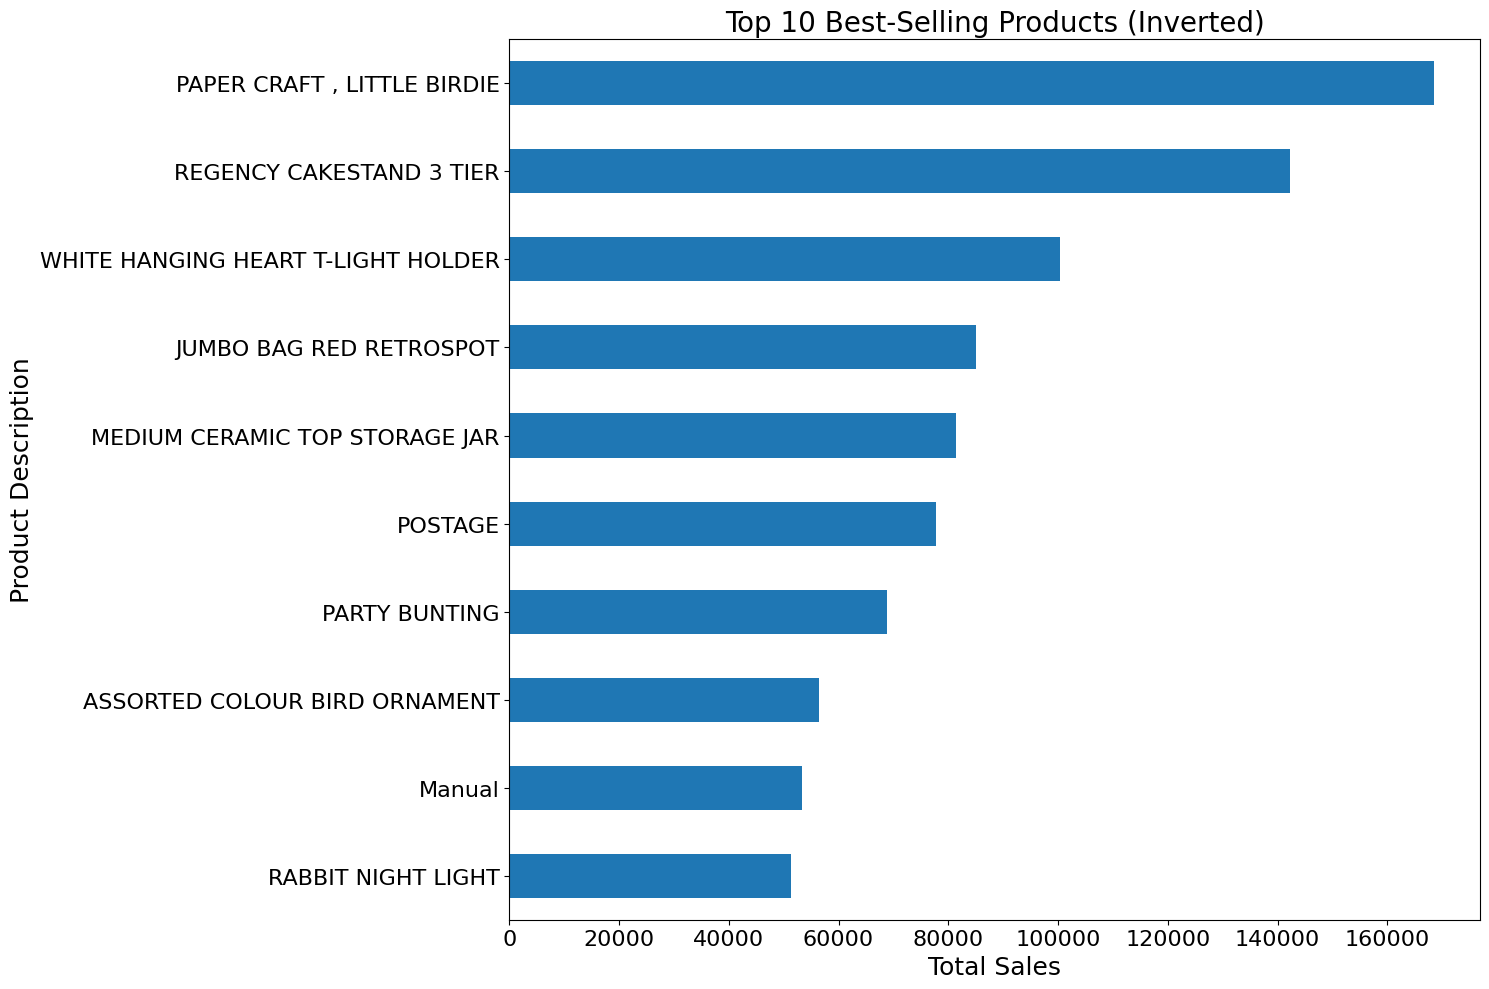

In [48]:
import matplotlib.pyplot as plt

# Grouping by 'Description', summing the 'Sales', and sorting the values
Top10products = df.groupby('Description', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(10)

# Plotting the horizontal bar chart
ax = Top10products.plot(x="Description", y="Sales", legend=False, kind='barh', figsize=(15,10))

# Inverting the y-axis to have the highest value at the bottom
plt.gca().invert_yaxis()

# Removing the grid
plt.grid(False)

# Setting labels and title
plt.xlabel('Total Sales', fontsize=18)
plt.ylabel('Product Description', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Top 10 Best-Selling Products (Inverted)', fontsize=20)

# Adjust layout
plt.tight_layout()  # Adjusts layout so everything fits without overlap
plt.show()


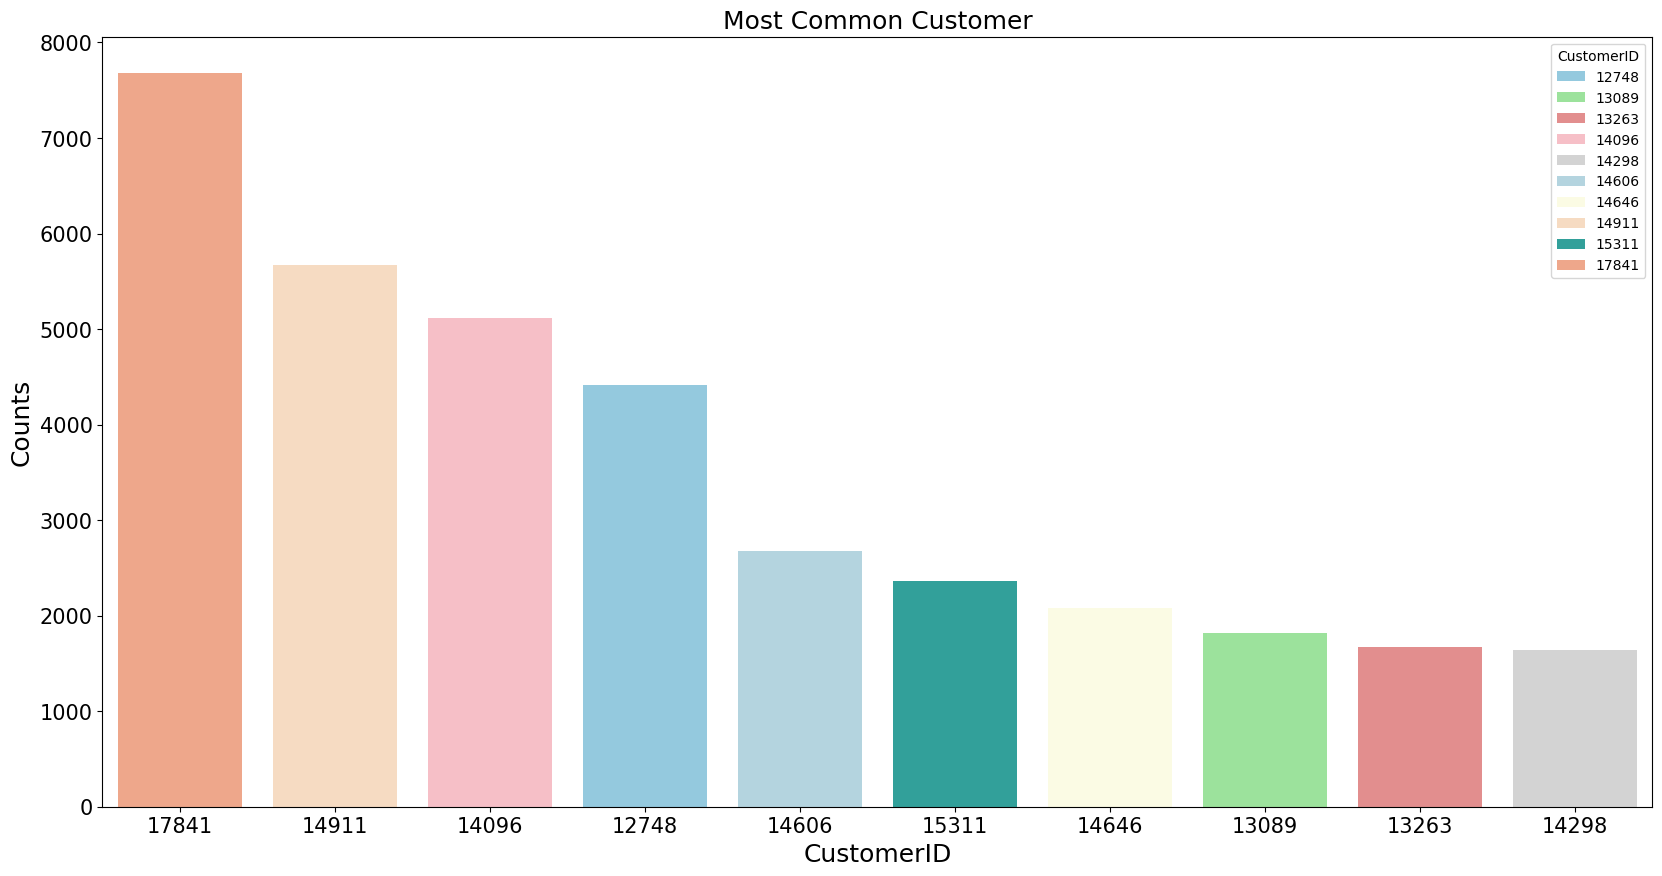

In [49]:
Top10customer = df['CustomerID'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.grid(False)

X = Top10customer.index
Y = Top10customer.values

# Define a list of colors
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightgrey', 
          'lightblue', 'lightyellow', 'peachpuff', 'lightseagreen', 'lightsalmon']

# Use the palette argument to apply the list of colors
sns.barplot(x=X, y=Y, hue=X, order=Top10customer.index, palette=colors)

plt.ylabel("Counts", fontsize=18)
plt.xlabel("CustomerID", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Most Common Customer", fontsize=18)
plt.show()

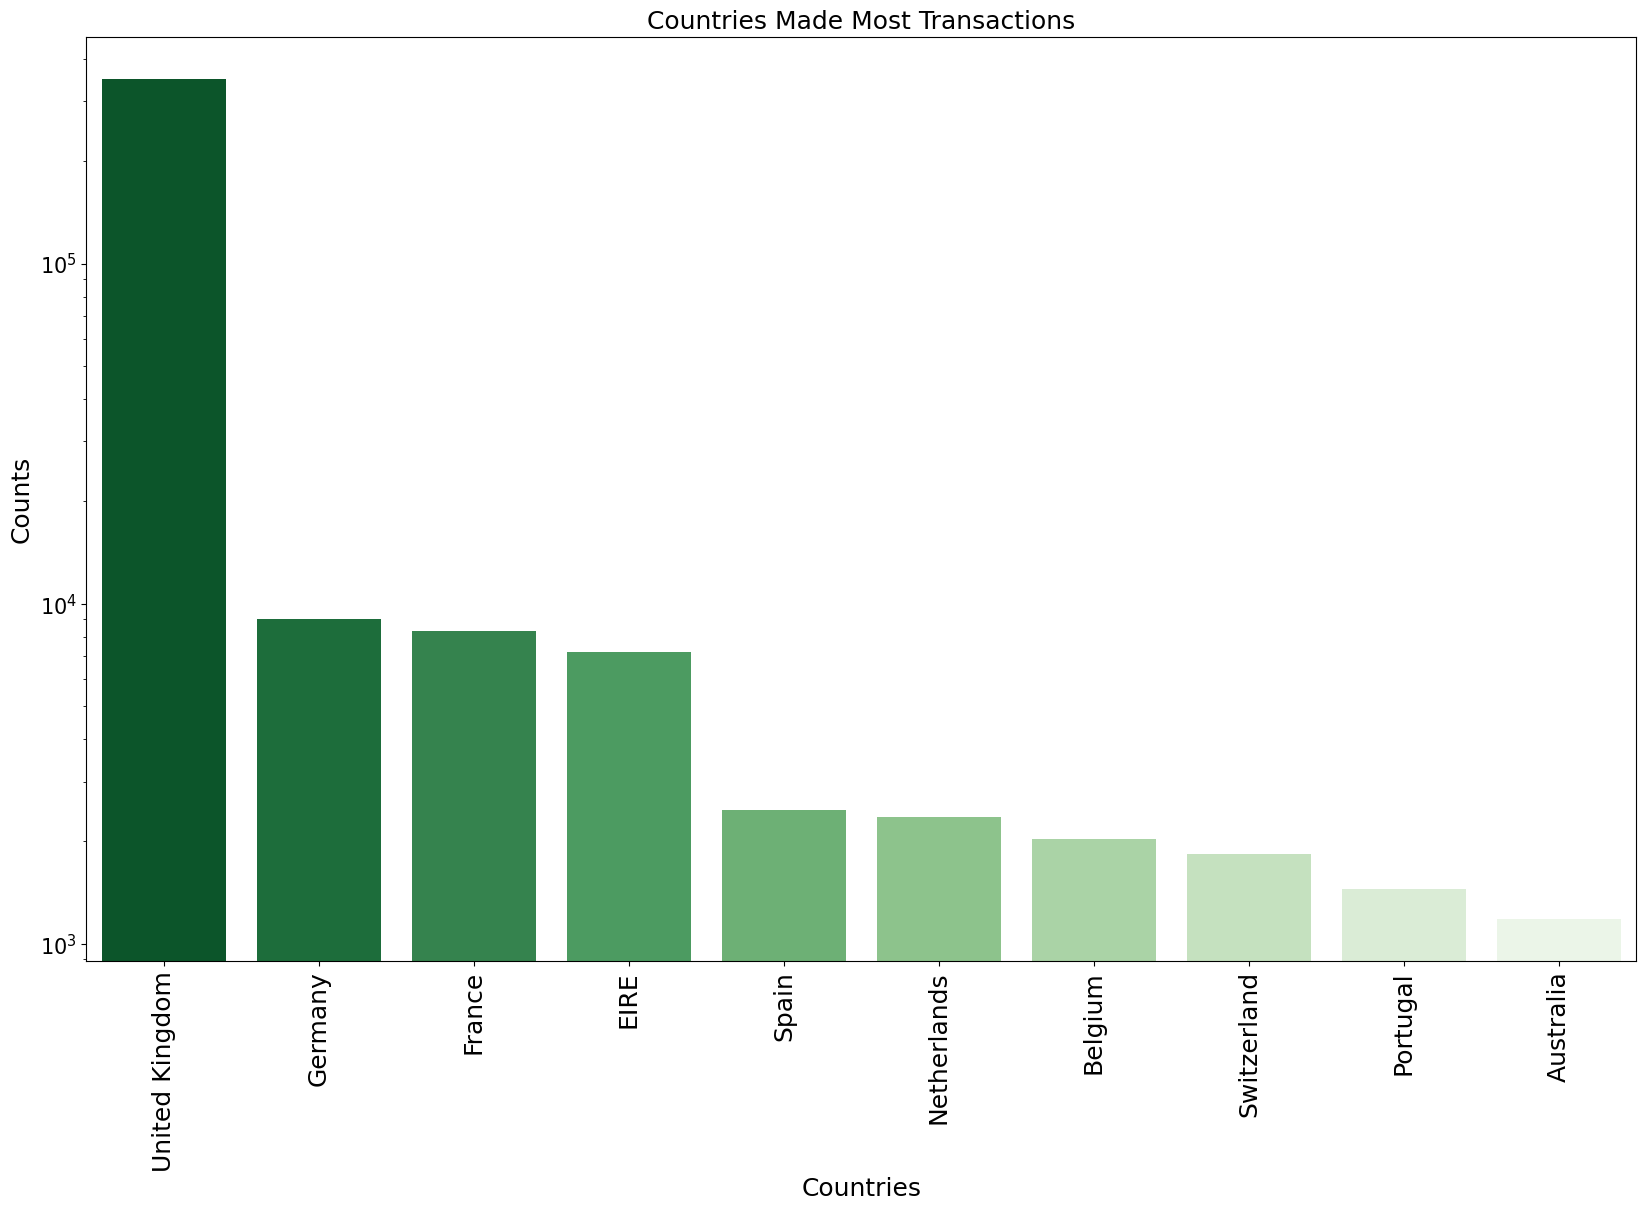

In [50]:
Top10country = df['Country'].value_counts().head(10)
plt.figure(figsize=(20,12))

X = Top10country.index
Y = Top10country.values

# Use keyword arguments for x and y in sns.barplot
plots = sns.barplot(x=X, y=Y,hue=X, palette="Greens_r")

plt.ylabel("Counts", fontsize=18)
plt.xlabel("Countries", fontsize=18)
plt.grid(False)
plt.xticks(rotation=90, fontsize=18)  # Rotates x-axis labels by 90 degrees
plt.yticks(fontsize=15)
plt.title("Countries Made Most Transactions", fontsize=18)
plt.yscale("log")  # Sets the y-axis to logarithmic scale

plt.show()

In [51]:
df['Date']=df['InvoiceDate'].copy()
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S',errors ='coerce')
df.set_index('Date',inplace = True)
df.sort_index(inplace=True)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales
Date,,,,,,,,,,,
2010-12-01 08:26:00,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30
2010-12-01 08:26:00,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34
2010-12-01 08:26:00,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,0,22.00
2010-12-01 08:26:00,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34
2010-12-01 08:26:00,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34


In [55]:
df['weekday_name']=df.index.strftime('%a')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name
Date,,,,,,,,,,,,
2010-12-01 08:26:00,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30,Wed
2010-12-01 08:26:00,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34,Wed
2010-12-01 08:26:00,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,0,22.00,Wed
2010-12-01 08:26:00,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34,Wed
2010-12-01 08:26:00,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34,Wed


In [53]:
print(df[df['InvoiceNo'] == 0])



                     InvoiceNo StockCode                          Description  \
Date                                                                            
2010-12-01 08:26:00          0    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00          0     71053                  WHITE METAL LANTERN   
2010-12-01 08:26:00          0    84406B       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00          0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00          0    84029E       RED WOOLLY HOTTIE WHITE HEART.   
2010-12-01 08:26:00          0     22752         SET 7 BABUSHKA NESTING BOXES   
2010-12-01 08:26:00          0     21730    GLASS STAR FROSTED T-LIGHT HOLDER   

                     Quantity         InvoiceDate  UnitPrice  CustomerID  \
Date                                                                       
2010-12-01 08:26:00         6 2010-12-01 08:26:00       2.55       17850   
2010-12-01 08:26:00         6 2010-12-01 0

In [54]:
print(df[df['Quantity'] < 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CancelledOrder, InternationalOrders, Sales, weekday_name]
Index: []
